# Análise de Dados dos Cursos da Alura

1. Obtenção de dados utilizando Web Scraping
2. Análise exploratório de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import re
from time import sleep

import requests
from bs4 import BeautifulSoup

/home/walisson/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import plotly.io as pio

pio.templates.default = 'plotly_dark'

In [3]:
schools = {
  'Programação': 'https://www.alura.com.br/cursos-online-programacao',
  'Data Science': 'https://www.alura.com.br/cursos-online-data-science',
  'Front-end': 'https://www.alura.com.br/cursos-online-front-end',
  'Inteligência Artificial': 'https://www.alura.com.br/cursos-online-inteligencia-artificial',
  'UX & Design': 'https://www.alura.com.br/cursos-online-design-ux',
  'DevOps': 'https://www.alura.com.br/cursos-online-devops',
  'Inovação & Gestão': 'https://www.alura.com.br/cursos-online-inovacao-gestao',
  'Mobile': 'https://www.alura.com.br/cursos-online-mobile'
}

In [4]:
df = pd.DataFrame(columns=['title', 'workload', 'url', 'school', 'registered_people', 'rating', 'instructor'])

In [5]:
alura_courses_filename = 'alura_courses.csv'

In [6]:
def get_courses_from_scraping():
  number_of_requests = 0

  for school, school_url in schools.items():
    response = requests.get(school_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    courses = soup.find_all('li', attrs={'class': 'subcategoria__item'})

    courses_list = []

    for course in courses:
        title = course.find('span', attrs={'class': 'card-curso__nome'}).text
        workload = course.find('span', attrs={'class': 'card-curso__carga'}).text
        url = course.find('a', attrs={'class': 'card-curso'}).get('href')

        url = f'https://www.alura.com.br{url}'
        workload = int(re.findall(r'\d+', workload)[0])

        courses_list.append([title, workload, url])

    df_school_courses = pd.DataFrame(courses_list, columns=['title', 'workload', 'url'])

    additional_infos = []

    for course_url in df_school_courses.url:
      response = requests.get(course_url)
      number_of_requests += 1

      course_page = BeautifulSoup(response.text, 'html.parser')

      course_registred_people = course_page.find('p', attrs={'class': 'courseInfo-card-wrapper-description'}, string="Pessoas nesse curso")
      if (course_registred_people) is not None:
        course_registred_people = course_registred_people.parent.find('p', attrs={'class': 'courseInfo-card-wrapper-infos'}).text

      course_rating = course_page.find('p', attrs={'class': 'courseInfo-card-wrapper-description'}, string="Avaliação média")
      if (course_rating) is not None:
        course_rating = course_rating.parent.find('p', attrs={'class': 'courseInfo-card-wrapper-infos'}).text

      course_instructor = course_page.find('h3', attrs={'class': 'instructor-title--name'}).text

      additional_infos.append([school, course_registred_people, course_rating, course_instructor])

      if number_of_requests % 10 == 0:
        sleep(1)
      

    df_school_courses_additional_infos = pd.DataFrame(additional_infos, columns=['school', 'registered_people', 'rating', 'instructor'])

    df_school_courses = pd.concat([df_school_courses, df_school_courses_additional_infos], axis=1)

    df = pd.concat([df, df_school_courses], axis=0)

    print(f'{school} done ✅')

    return df

In [7]:
try:
  df = pd.read_csv(alura_courses_filename)
except:
  df = get_courses_from_scraping()
  df.to_csv('alura_courses.csv', index=False)

In [8]:
df.head()

,title,workload,url,school,registered_people,rating,instructor
0,Curso JavaScript e HTML: desenvolva um jogo e ...,16,https://www.alura.com.br/curso-online-logica-p...,Programação,167775,9.5,Flavio Henrique de Souza Almeida
1,Curso JavaScript e HTML: pratique lógica com d...,10,https://www.alura.com.br/curso-online-logica-p...,Programação,63513,9.3,Flavio Henrique de Souza Almeida
2,Curso Lógica de programação: mergulhe em progr...,6,https://www.alura.com.br/curso-online-logica-p...,Programação,35378,9.6,Guilherme Lima
3,Curso Lógica de programação: explore funções e...,6,https://www.alura.com.br/curso-online-logica-p...,Programação,18258,9.6,Guilherme Lima
4,Curso Lógica de programação: praticando com de...,8,https://www.alura.com.br/curso-online-logica-p...,Programação,5208,9.3,Jacqueline Oliveira


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1440 non-null   object 
 1   workload           1440 non-null   int64  
 2   url                1440 non-null   object 
 3   school             1440 non-null   object 
 4   registered_people  1440 non-null   int64  
 5   rating             1434 non-null   float64
 6   instructor         1440 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 78.9+ KB


In [10]:
df.describe()

,workload,registered_people,rating
count,1440.000000,1440.000000,1434.000000
mean,8.653472,4799.609722,9.227336
std,2.140006,9937.906284,0.171989
min,1.000000,52.000000,8.400000
25%,8.000000,778.250000,9.100000
50%,8.000000,1827.000000,9.200000
75%,10.000000,4630.750000,9.300000
max,20.000000,167775.000000,9.700000


In [11]:
df[['school', 'instructor']].describe(include=object)

,school,instructor
count,1440,1440
unique,8,224
top,Inovação & Gestão,Vinicius Dias
freq,291,75


In [12]:
df.groupby('school')[['registered_people']].describe()

registered_people                                    \
                                    count         mean           std    min   
school                                                                        
Data Science                        252.0  3898.250000   7922.147081  107.0   
DevOps                              128.0  4796.710938   5230.424350  193.0   
Front-end                           128.0  5524.546875   9815.473790   85.0   
Inovação & Gestão                   291.0  8763.766323  14489.727463   84.0   
Inteligência Artificial              44.0  1459.727273   2306.576940  109.0   
Mobile                              128.0  1802.570312   3245.343927   76.0   
Programação                         234.0  5417.858974  12622.729701   58.0   
UX & Design                         235.0  2106.238298   3458.410950   52.0   

                                                             
                             25%     50%      75%       max  
school                                                       
Data Science              737.00  1639.5  4187.25   88599.0  
DevOps                   1364.50  2588.5  6299.25   31706.0  
Front-end                 574.00  1722.0  5224.75   56912.0  
Inovação & Gestão        1363.00  2900.0  9302.00   93768.0  
Inteligência Artificial   290.50   678.0  1446.25   11503.0  
Mobile                    288.25   879.5  1891.50   23902.0  
Programação              1247.50  2353.0  5703.75  167775.0  
UX & Design               517.50  1226.0  2216.00   38679.0

In [13]:
px.box(df, x='registered_people', color='school')

## Top 10 cursos com mais matrículas

In [14]:
pd.set_option('display.max_colwidth', None)

In [15]:
df[['title', 'workload', 'school', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10).style.apply(lambda x: ['background-color: rgba(0, 255, 0, 0.1)' if x.school == 'Inovação & Gestão' else '']*5, axis=1)

,title,workload,school,registered_people,rating
0,Curso JavaScript e HTML: desenvolva um jogo e pratique lógica de programação,16,Programação,167775,9.500000
1147,Curso Comunicação não violenta: consciência para agir,8,Inovação & Gestão,93768,9.300000
296,Curso Data Science: analise e visualização de dados,6,Data Science,88599,9.200000
1207,Curso Aprender a aprender: técnicas para seu autodesenvolvimento,8,Inovação & Gestão,84675,9.400000
1176,Curso Comunicação assertiva: reduzindo conflitos e frustrações,6,Inovação & Gestão,74648,9.300000
1148,Curso Comunicação não violenta parte 2: mantendo a empatia,4,Inovação & Gestão,74631,9.300000
1144,Curso Feedback: a arte de orientar e ser orientado com sentido,5,Inovação & Gestão,69215,9.400000
1051,Curso Gestão Ágil: liderando a mudança em um ambiente de agilidade,6,Inovação & Gestão,66922,9.400000
1,"Curso JavaScript e HTML: pratique lógica com desenhos, animações e um jogo",10,Programação,63513,9.300000
1298,Curso Vendas de alta performance: vendas na era digital,8,Inovação & Gestão,62468,9.300000


## Top 10 cursos com as melhores avaliações

In [16]:
df[['title', 'workload', 'school', 'registered_people', 'rating']].sort_values(by=['rating', 'registered_people'], ascending=False).head(10)

,title,workload,school,registered_people,rating
490,"Curso HTML e CSS: cabeçalho, footer e variáveis CSS",6,Front-end,29164,9.7
491,Curso HTML e CSS: trabalhando com responsividade e publicação de projetos,6,Front-end,24264,9.7
489,"Curso HTML e CSS: Classes, posicionamento e Flexbox",8,Front-end,35635,9.6
2,Curso Lógica de programação: mergulhe em programação com JavaScript,6,Programação,35378,9.6
3,Curso Lógica de programação: explore funções e listas,6,Programação,18258,9.6
517,Curso React: desenvolvendo com JavaScript,14,Front-end,17874,9.6
817,Curso Produção de vídeo: o que há por trás do mundo do audiovisual,10,UX & Design,15667,9.6
139,Curso Spring Boot 3: desenvolva uma API Rest em Java,10,Programação,14633,9.6
430,Curso Power BI Desktop: construindo meu primeiro dashboard,8,Data Science,13973,9.6
395,Curso Excel: domine o editor de planilhas,8,Data Science,12305,9.6


## Distribuição das médias do cursos

<Axes: xlabel='rating', ylabel='Count'>

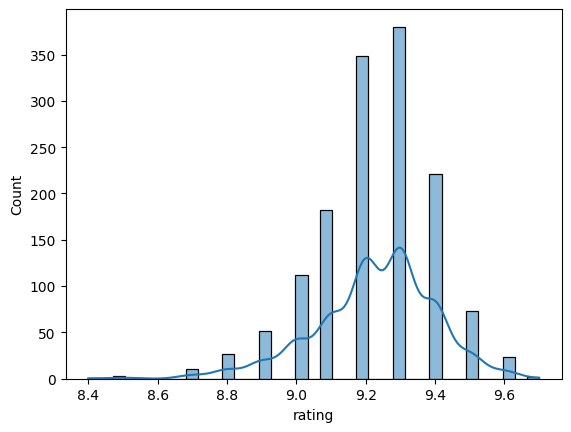

In [17]:
sns.histplot(data=df, x='rating', kde=True)

## Análises por Formação

## Top 10 cursos por formação (número de matrículas)

### Inovação & Gestão

In [23]:
df.query('school == "Inovação & Gestão"')[['title', 'workload', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10)

,title,workload,registered_people,rating
1147,Curso Comunicação não violenta: consciência para agir,8,93768,9.3
1207,Curso Aprender a aprender: técnicas para seu autodesenvolvimento,8,84675,9.4
1176,Curso Comunicação assertiva: reduzindo conflitos e frustrações,6,74648,9.3
1148,Curso Comunicação não violenta parte 2: mantendo a empatia,4,74631,9.3
1144,Curso Feedback: a arte de orientar e ser orientado com sentido,5,69215,9.4
1051,Curso Gestão Ágil: liderando a mudança em um ambiente de agilidade,6,66922,9.4
1298,Curso Vendas de alta performance: vendas na era digital,8,62468,9.3
1302,Curso Vendas de alta performance: perguntas poderosas,6,59394,9.3
1050,Curso A Empresa Ágil: implemente o Business Agility nas organizações,6,54863,9.3
1079,Curso Liderança ambidestra: buscando inovação e resultados,6,49211,9.2


### DevOps

In [25]:
df.query('school == "DevOps"')[['title', 'workload', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10)

,title,workload,registered_people,rating
991,Curso Docker: criando e gerenciando containers,10,31706,9.5
992,"Curso Kubernetes: Pods, Services e ConfigMaps",8,20548,9.4
1005,"Curso Kafka: produtores, consumidores e streams",8,19124,9.3
934,Curso Linux Onboarding: usando a CLI de uma forma rápida e prática,8,18648,9.3
896,Curso Integração Contínua: mais qualidade e menos risco no desenvolvimento,6,18216,9.2
965,Curso Microsoft AZ-900 parte 1: Azure Fundamentals,8,17841,9.3
948,Curso Microsserviços: padrões de projeto,6,16429,9.2
927,Curso Shell Scripting parte 1: scripts de automação de tarefas,8,14671,9.3
922,Curso Cloud Onboarding: trabalhando com os principais provedores,10,14541,9.2
980,Curso Pentest: explorando vulnerabilidades em aplicações web,10,14071,9.3


In [26]:
df.query('school == "Programação"')[['title', 'workload', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10)

,title,workload,registered_people,rating
0,Curso JavaScript e HTML: desenvolva um jogo e pratique lógica de programação,16,167775,9.5
1,"Curso JavaScript e HTML: pratique lógica com desenhos, animações e um jogo",10,63513,9.3
2,Curso Lógica de programação: mergulhe em programação com JavaScript,6,35378,9.6
56,"Curso PHP: conceitos, lidando com dados, loops e mais",6,30229,9.5
120,Curso Certificação Java SE 7 Programmer I,8,28319,9.1
18,Curso Python: avançando na orientação a objetos,10,27366,8.9
224,Curso C: conhecendo a Linguagem das Linguagens,8,26059,9.2
181,Curso Unity parte 1: criação de um jogo de sobrevivência à zumbis para Web,8,22542,9.4
104,Curso Java: criando a sua primeira aplicação,8,20291,9.5
190,Curso Quality Assurance: plano de testes e gestão de bugs,8,20154,9.2


In [27]:
df.query('school == "Front-end"')[['title', 'workload', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10)

,title,workload,registered_people,rating
488,"Curso HTML e CSS: ambientes de desenvolvimento, estrutura de arquivos e tags",8,56912,9.5
586,Curso JavaScript: explorando a linguagem,10,45644,9.1
598,Curso JavaScript para Web: Crie páginas dinâmicas,10,41448,9.2
585,Curso JavaScript: programando a Orientação a Objetos,10,38637,9.2
489,"Curso HTML e CSS: Classes, posicionamento e Flexbox",8,35635,9.6
490,"Curso HTML e CSS: cabeçalho, footer e variáveis CSS",6,29164,9.7
486,Curso HTML e CSS: praticando HTML/CSS,8,27938,9.3
601,Curso TypeScript parte 1: evoluindo seu JavaScript,10,26857,9.5
491,Curso HTML e CSS: trabalhando com responsividade e publicação de projetos,6,24264,9.7
587,Curso JavaScript: interfaces e Herança em Orientação a Objetos,12,22152,8.9


In [28]:
df.query('school == "Data Science"')[['title', 'workload', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10)

,title,workload,registered_people,rating
296,Curso Data Science: analise e visualização de dados,6,88599,9.2
234,Curso SQL com MySQL: manipule e consulte dados,12,57177,9.5
337,Curso Machine Learning: classificação com SKLearn,8,30310,9.3
394,Curso Excel: criação de macros e automatização de tarefas,12,29870,9.4
235,Curso Consultas SQL: avançando no SQL com MySQL,14,27173,9.5
264,"Curso Modelagem de banco de dados: entidades, relacionamentos e atributos",8,22918,9.2
473,Curso Estatística com Python: frequências e medidas,10,22729,9.4
243,Curso PostgreSQL,8,22283,9.2
392,"Curso Análise de dados: cálculos, padrões e estratégias com Excel",6,16011,9.1
391,Curso Excel: simulação e análise de cenários,6,15983,9.5


In [30]:
df.query('school == "UX & Design"')[['title', 'workload', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10)

,title,workload,registered_people,rating
725,Curso Design Thinking: viabilizando soluções,8,38679,9.3
713,Curso Adobe Illustrator: desenho vetorial,10,20190,9.4
817,Curso Produção de vídeo: o que há por trás do mundo do audiovisual,10,15667,9.6
843,Curso Desenho: esboço e composição de imagens,6,10802,9.1
809,Curso Adobe Premiere 2020: edição de vídeo,10,10298,9.3
783,Curso Design de apresentações: trabalhando com o Power Point,14,10037,9.3
658,Curso Adobe XD: design visual de um site mobile,10,9875,9.3
753,Curso Tipografia: conhecendo o que há por trás dos tipos,10,9277,9.0
669,Curso UX: metodologias práticas para designers,10,8933,8.9
811,Curso Premiere: ritmo de edição e manipulando emoções,10,8552,9.4


In [31]:
df.query('school == "Mobile"')[['title', 'workload', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10)

,title,workload,registered_people,rating
1370,Curso Android parte 1: crie um app mobile,10,23902,9.2
1333,Curso Flutter: criando um app,15,22806,9.2
1365,Curso Dart: criando e manipulando variáveis e listas,10,9198,9.4
1342,"Curso Flutter: Widgets, Stateless, Stateful, Imagens e Animações",16,8346,9.6
1331,Curso Persistência com Flutter: crie um app com armazenamento interno,8,7696,9.2
1374,Curso Android com Kotlin: criando um app,16,6462,9.4
1312,Curso React Native: utilizando e criando Hooks,10,6163,9.3
1335,Curso Flutter com Web API: integrando sua app mobile,8,5877,9.2
1371,"Curso Android parte 2: avançando com listeners, menu e UI",10,5360,9.3
1382,Curso Android parte 1: testes automatizados e TDD,8,5164,9.2


In [33]:
df.query('school == "Inteligência Artificial"')[['title', 'workload', 'registered_people', 'rating']].sort_values(by='registered_people', ascending=False).head(10)

,title,workload,registered_people,rating
614,Curso Inteligência artificial Generativa: Midjourney e ChatGPT,8,11503,8.8
616,Curso ChatGPT: desvendando a IA em conversas e suas aplicações,8,9657,9.3
617,Curso ChatGPT: otimizando a qualidade dos resultados,8,5189,9.2
618,Curso ChatGPT e programação: aumente sua produtividade,8,4461,9.1
650,Curso Inteligência Artificial e UX: otimize a construção de um produto digital,8,2802,9.2
615,Curso ChatGPT e JavaScript: construa o jogo Pong,8,2529,9.2
636,Curso ChatGPT com Excel: automação com macros,10,2456,9.2
619,Curso GitHub Copilot e ChatGPT: impulsionando seu desenvolvimento com IA,8,2375,9.1
640,Curso Machine Learning: utilizando ChatGPT como assistente,10,2099,9.2
651,Curso Inteligência artificial e personas: acelerando o processo de criação,8,2011,9.3


## Agrupamento por Formação

In [18]:
school_group = df.groupby('school').agg({'workload': 'sum', 'registered_people': 'median', 'rating': 'mean'}).reset_index().sort_values(by='registered_people', ascending=False)

school_group.rename(columns={ 'school': 'Formação', 'workload': "Carga horária total", 'registered_people': 'Média de Matrículas', 'rating': 'Avaliação Média' }, inplace=True)

school_group.style.apply(lambda x: ['background-color: rgba(0, 255, 0, 0.1)' if x['Formação'] == 'DevOps' else ''] * 4, axis=1)

,Formação,Carga horária total,Média de Matrículas,Avaliação Média
3,Inovação & Gestão,2189,2900.000000,9.239310
1,DevOps,1082,2588.500000,9.206250
6,Programação,2077,2353.000000,9.259227
2,Front-end,1072,1722.000000,9.224603
0,Data Science,2348,1639.500000,9.212302
7,UX & Design,2150,1226.000000,9.253846
5,Mobile,1185,879.500000,9.177165
4,Inteligência Artificial,358,678.000000,9.138636


<Axes: xlabel='rating'>

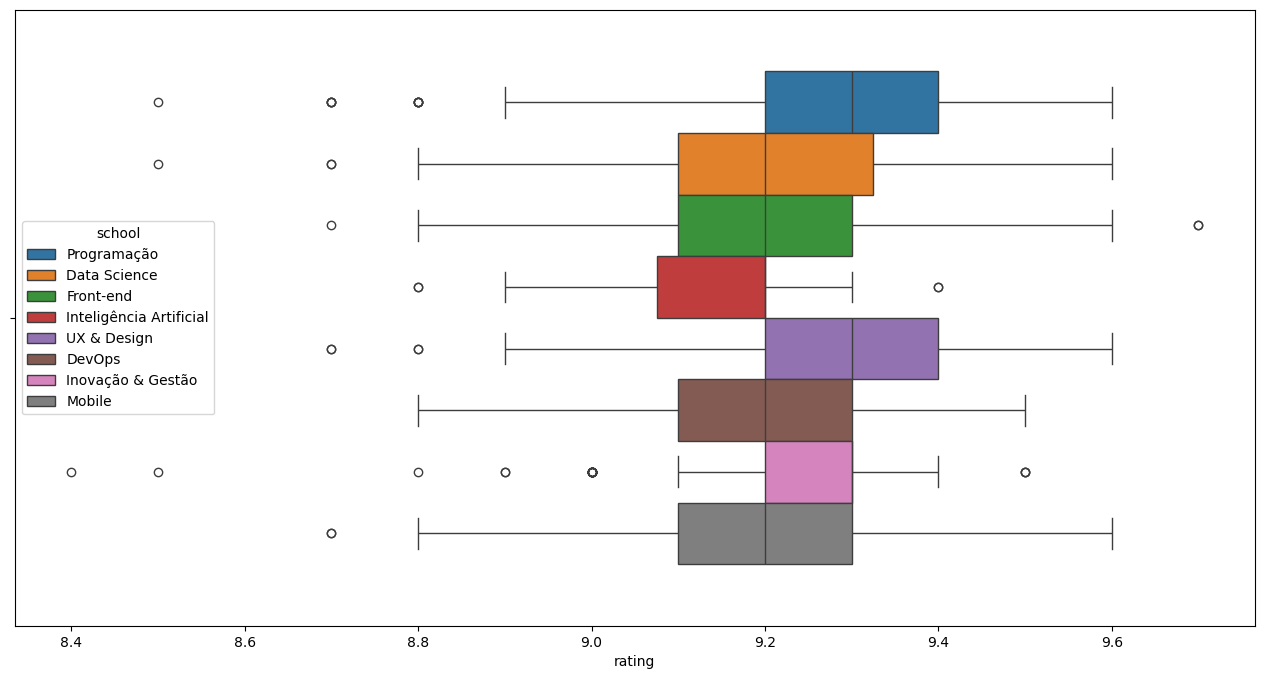

In [18]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='rating', hue='school')

<Axes: xlabel='rating', ylabel='Count'>

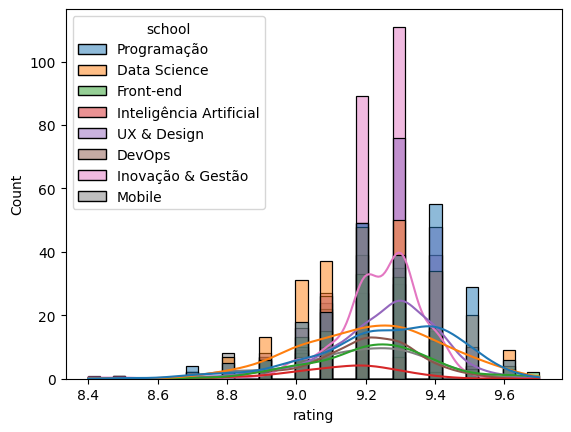

In [19]:
sns.histplot(data=df, x='rating', kde=True, hue='school')

In [20]:
px.histogram(df, x="rating", color="school", height=500,
               hover_data=df.columns)

In [29]:
px.box(df, x="rating", color="school", height=500)

In [23]:
fig = px.bar(data_frame=school_group, y='Formação', x='Média de Matrículas', orientation="h", color="Formação")
fig.show()

In [30]:
df.sort_values(by='registered_people', ascending=False)

,title,workload,url,school,registered_people,rating,instructor
0,Curso JavaScript e HTML: desenvolva um jogo e pratique lógica de programação,16,https://www.alura.com.br/curso-online-logica-programacao-javascript-html,Programação,167775,9.5,Flavio Henrique de Souza Almeida
1147,Curso Comunicação não violenta: consciência para agir,8,https://www.alura.com.br/curso-online-comunicacao-nao-violenta,Inovação & Gestão,93768,9.3,Priscila Stuani
296,Curso Data Science: analise e visualização de dados,6,https://www.alura.com.br/curso-online-data-science-primeiros-passos,Data Science,88599,9.2,Guilherme Silveira
1207,Curso Aprender a aprender: técnicas para seu autodesenvolvimento,8,https://www.alura.com.br/curso-online-aprender-a-aprender-tecnicas-para-seu-autodesenvolvimento,Inovação & Gestão,84675,9.4,Suzana Braga Lisboa
1176,Curso Comunicação assertiva: reduzindo conflitos e frustrações,6,https://www.alura.com.br/curso-online-comunicacao-assertiva-reduzindo-conflitos-e-frustracaoes,Inovação & Gestão,74648,9.3,Cintia Amianti
...,...,...,...,...,...,...,...
1131,Curso COBIT 2019: compreendendo princípios e estrutura,8,https://www.alura.com.br/curso-online-cobit-2019-compreendendo-principios-estrutura,Inovação & Gestão,84,8.5,Roberto Sabino
1330,Curso React Native: criando menu e navegando entre telas,6,https://www.alura.com.br/curso-online-react-native-menu-navegando-entre-telas,Mobile,79,NaN,Mônica Mazzochi Hillman
1329,Curso React native: domine middlewares com Redux Saga,8,https://www.alura.com.br/curso-online-react-native-domine-middlewares-redux-saga,Mobile,76,9.0,Luiz Fernando Ribeiro
55,Curso JavaScript: conhecendo objetos,8,https://www.alura.com.br/curso-online-javascript-conhecendo-objetos,Programação,58,NaN,Juliana Amoasei


In [28]:
df[['workload', 'rating', 'registered_people']].corr()

,workload,rating,registered_people
workload,1.000000,0.081078,-0.024966
rating,0.081078,1.000000,0.157065
registered_people,-0.024966,0.157065,1.000000


<Axes: >

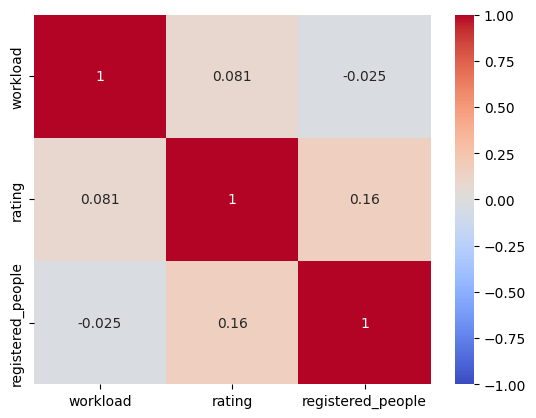

In [30]:
sns.heatmap(df[['workload', 'rating', 'registered_people']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)